# 2주차: Decision Tree

와인 데이터를 이용해서 Decision Tree 모델 실습

## 라이브러리

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## 데이터 로드

In [4]:
red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

In [5]:
red_wine['color'] = 1.
white_wine['color'] = 0.

data = pd.concat([red_wine, white_wine])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 710.6 KB


In [6]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0.0


### 와인 데이터셋 컬럼 설명

*   `fixed acidity`: 고정 산도 (와인의 신맛에 영향)
*   `volatile acidity`: 휘발성 산도 (높으면 식초와 같은 신맛이 강해짐)
*   `citric acid`: 시트르산 함량 (신선한 신맛을 더함)
*   `residual sugar`: 잔류 당분 (와인의 단맛을 결정)
*   `chlorides`: 염화물 함량 (와인의 짠맛에 영향)
*   `free sulfur dioxide`: 자유 이산화황 (산화 및 미생물 번식 방지)
*   `total sulfur dioxide`: 총 이산화황 (첨가된 총 이산화황의 양)
*   `density`: 밀도 (당분과 알코올 함량에 영향)
*   `pH`: pH (와인의 산성도, 낮을수록 산성)
*   `sulphates`: 황산염 함량 (쓴맛과 항산화 작용)
*   `alcohol`: 알코올 함량 (와인의 도수)
*   `quality`: 품질 점수 (높을수록 좋은 품질)
*   `color`: 와인의 색깔 (레드 와인/화이트 와인 구분)

In [7]:
# describe() 메서드 사용
description = data.describe()
print(description)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

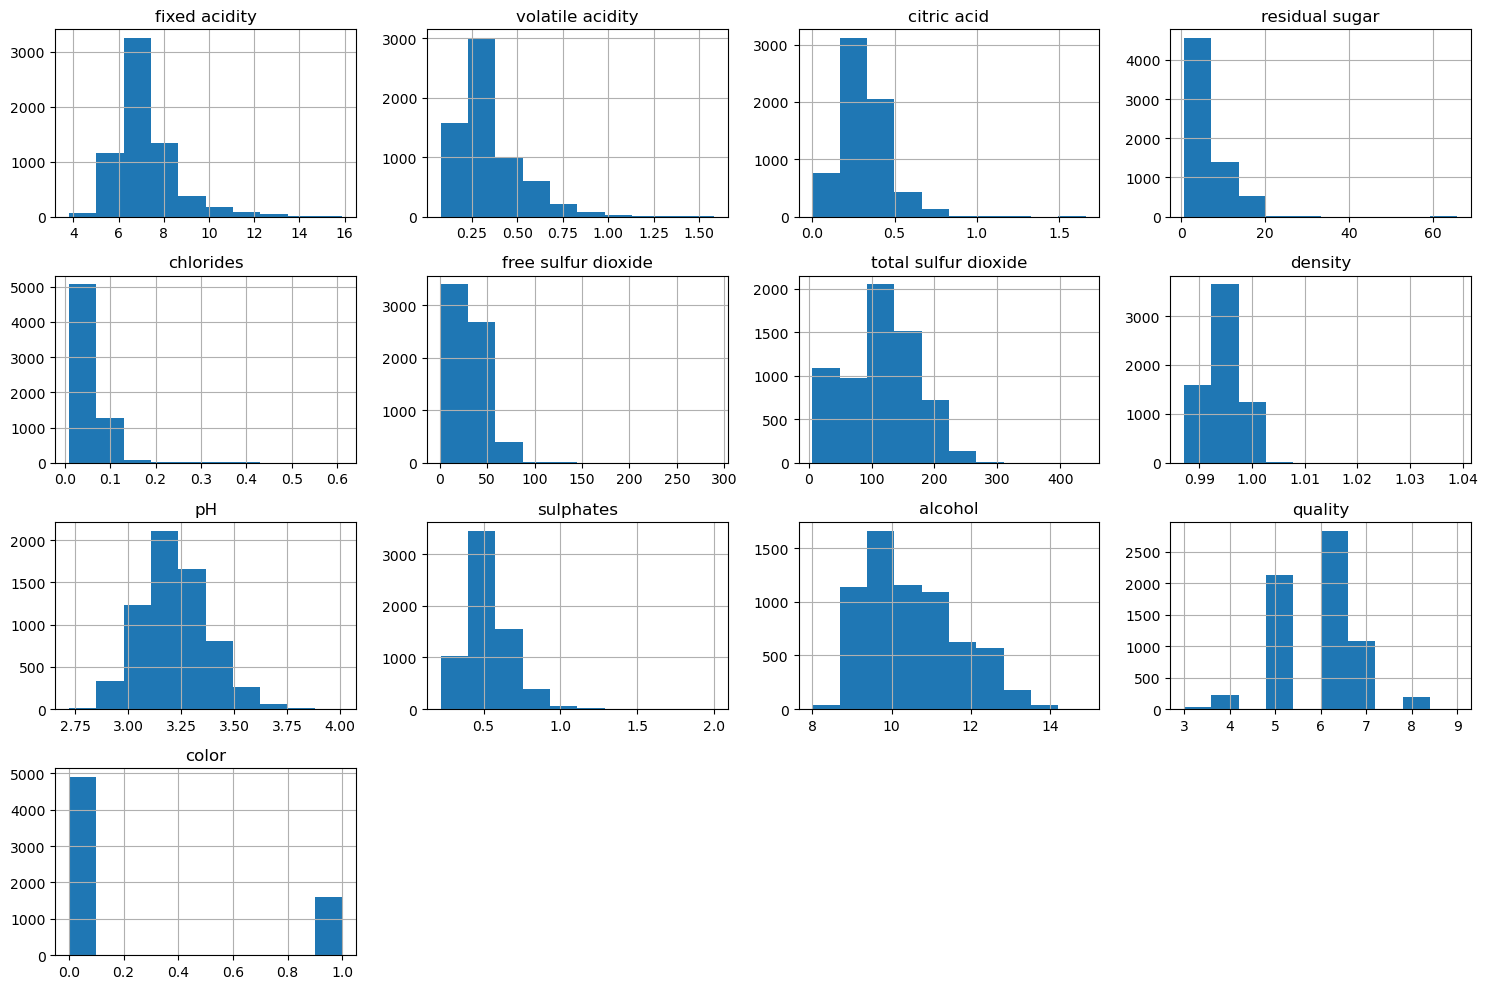

In [8]:
# Histogram (각 컬럼별로 subplot 생성)
data.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

## Decision Tree 기본

In [9]:
data['quality_group'] = pd.qcut(data['quality'], 3, labels=[0, 1, 2])
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,quality_group
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1.0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1.0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.0,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0.0,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0.0,2


In [10]:
# 데이터 분할
X = data.drop(['quality', 'quality_group'], axis=1)
y = data['quality_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# 1. 기본적인 DecisionTree 학습, 트리 시각화, 테스트 정확도
dt_basic = DecisionTreeClassifier()
dt_basic.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
y_pred_basic = dt_basic.predict(X_test)
accuracy_basic = accuracy_score(y_test, y_pred_basic)

In [13]:
print("기본 DecisionTree 테스트 정확도:", accuracy_basic)

기본 DecisionTree 테스트 정확도: 0.6269230769230769


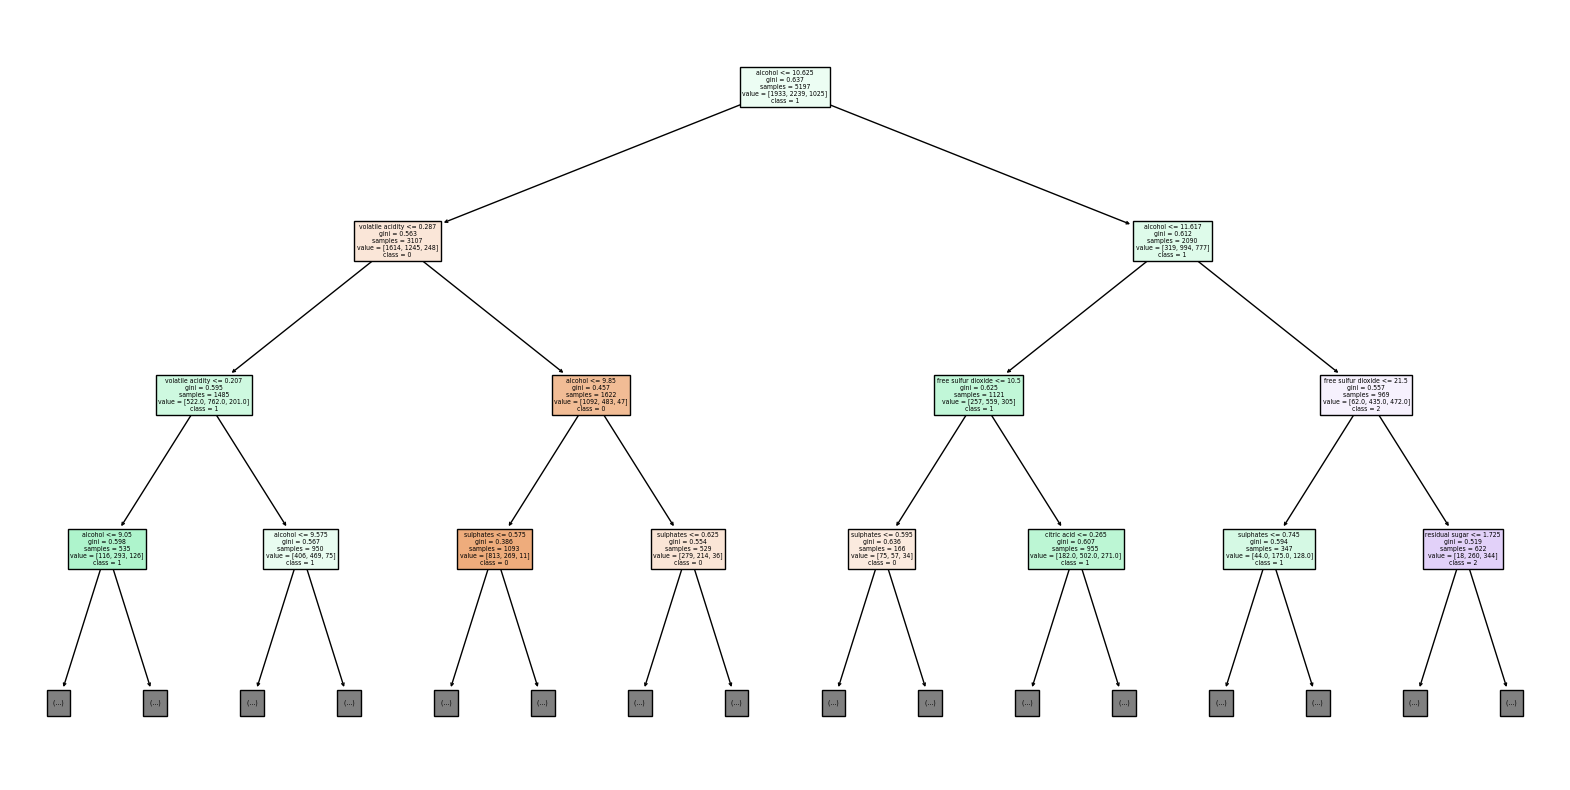

In [14]:
plt.figure(figsize=(20, 10)) # plot 크기 조절
plot_tree(dt_basic, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str), max_depth=3) # class_names 추가 및 max_depth 제한
plt.show()

## 노드 수에 따른 정확도 변화

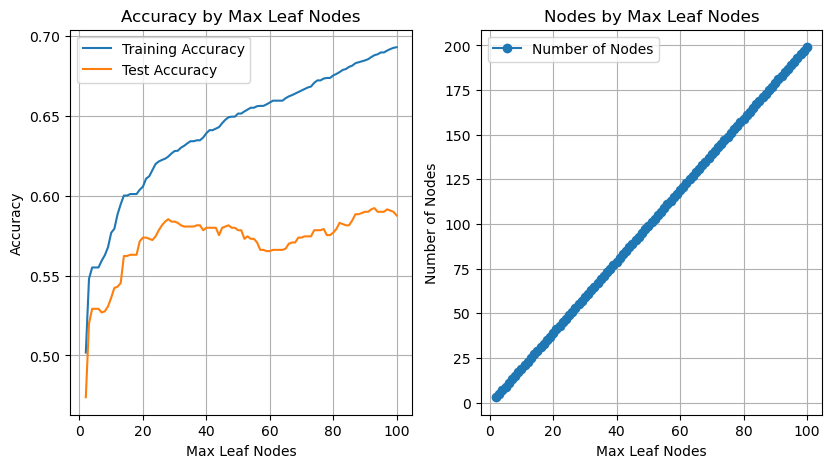

In [15]:
# 2. max_leaf_nodes 조절에 따른 정확도 및 노드 수 변화
train_accuracies = []
test_accuracies = []
node_counts = []
leaf_nodes = range(2, 101, 1)

for leaf in leaf_nodes:
    dt = DecisionTreeClassifier(max_leaf_nodes=leaf, random_state=42)
    dt.fit(X_train, y_train)
    y_pred_train = dt.predict(X_train)
    y_pred_test = dt.predict(X_test)
    train_accuracies.append(accuracy_score(y_train, y_pred_train))
    test_accuracies.append(accuracy_score(y_test, y_pred_test))
    node_counts.append(dt.tree_.node_count)

# 그래프 그리기
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(leaf_nodes, train_accuracies, label='Training Accuracy')
plt.plot(leaf_nodes, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy by Max Leaf Nodes')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(leaf_nodes, node_counts, marker='o', linestyle='-', label='Number of Nodes')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Number of Nodes')
plt.title('Nodes by Max Leaf Nodes')
plt.legend()
plt.grid(True)

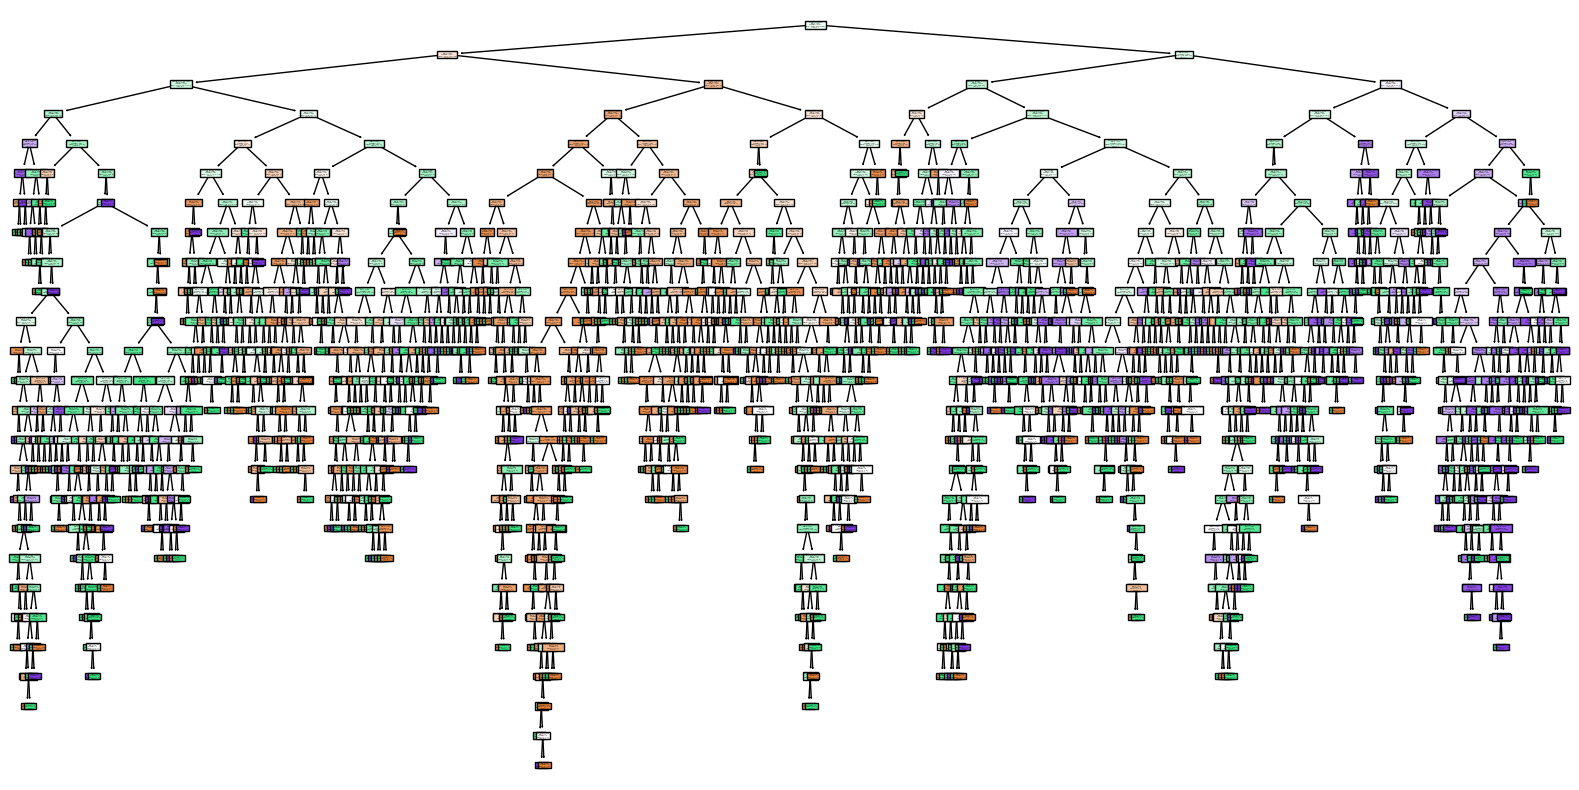

In [14]:
plt.figure(figsize=(20, 10)) # plot 크기 조절
plot_tree(dt_basic, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str))
plt.show()

## 하이퍼 파라미터

In [16]:
# 데이터 분할
X = data.drop(['color', 'quality_group'], axis=1)
y = data['color']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
dt_basic = DecisionTreeClassifier()
dt_basic.fit(X_train, y_train)

y_pred_basic = dt_basic.predict(X_test)
accuracy_basic = accuracy_score(y_test, y_pred_basic)

print("기본 DecisionTree 테스트 정확도:", accuracy_basic)

기본 DecisionTree 테스트 정확도: 0.9823076923076923


최적 하이퍼 파라미터: {'criterion': 'entropy', 'max_depth': 17, 'max_leaf_nodes': 85, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'}
최적 하이퍼 파라미터의 정확도: 0.9865314281483677
최적 모델의 테스트 정확도: 0.9823076923076923


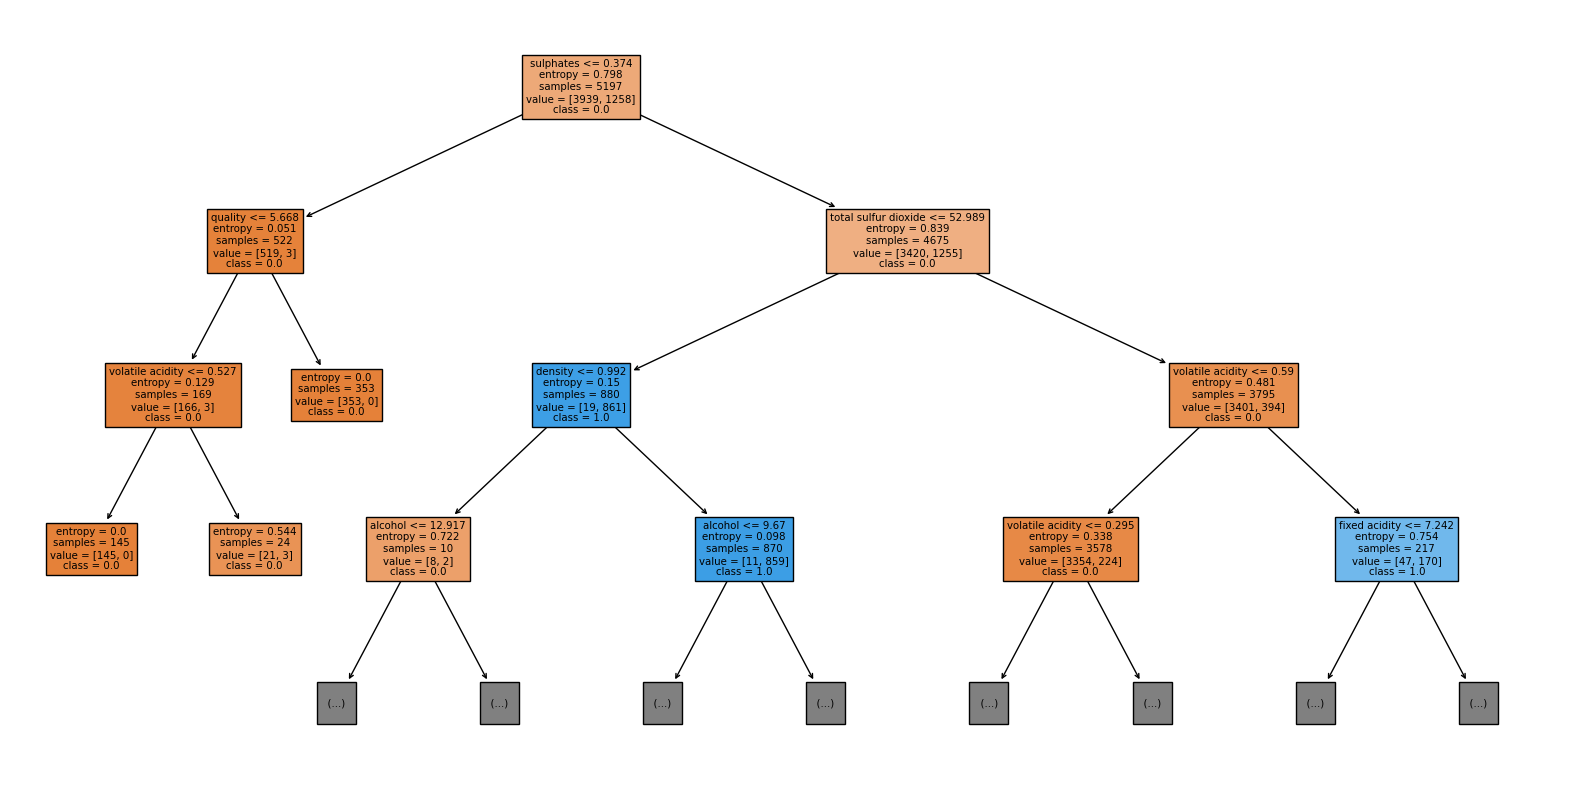

In [19]:
# 3. GridSearchCV로 최적의 하이퍼 파라미터 서치 후 트리 시각화, 정확도 확인
param_grid = {
    'max_depth': range(3, 21, 2),
    'min_samples_split': range(2, 21, 2),
    'min_samples_leaf': range(1, 6, 2),
    'max_leaf_nodes': range(10, 101, 5),
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("최적 하이퍼 파라미터:", grid_search.best_params_)
print("최적 하이퍼 파라미터의 정확도:", grid_search.best_score_)

best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("최적 모델의 테스트 정확도:", accuracy_best)

plt.figure(figsize=(20, 10))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str), max_depth=3)
plt.show()

# 과제

자동차 평가 데이터 베이스를 이용한 Decision Tree 실습

Bohanec, M. (1988). Car Evaluation [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5JP48.

In [ ]:
# pip install ucimlrepo

In [20]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

In [21]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [22]:
y

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


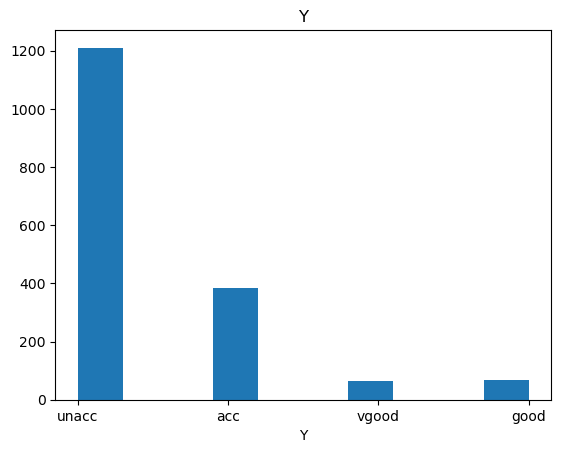

In [23]:
import matplotlib.pyplot as plt

plt.hist(y)
plt.xlabel('Y')
plt.title('Y')
plt.show()

## 데이터셋 컬럼 설명

*   `buying`: 구매 가격
*   `maint`: 유지 보수 비용
*   `doors`: 문의 개수
*   `persons`: 탑승 가능 인원 수
*   `lug_boot`: 수납 공간 크기
*   `safety`: 안전 등급

## 1. Decision Tree 기본으로 성능 확인

In [25]:
# TODO: 데이터를 트레인 데이터와 테스트 데이터로 나눈 뒤 Decision Tree에 학습시켜서 테스트 데이터 정확도가 얼마나 나오는지 확인
# Tip: X값이 범주형일 경우 수치형으로 인코딩을 해줘야 합니다.

In [51]:
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
model_pipe = make_pipeline( OneHotEncoder(), DecisionTreeClassifier() ) 

In [61]:
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [62]:
y_pred_basic = model_pipe.predict(X_test)
accuracy_basic = accuracy_score(y_test, y_pred_basic)

print("기본 DecisionTree 테스트 정확도:", accuracy_basic)

기본 DecisionTree 테스트 정확도: 0.9566473988439307


## 2. 최적의 하이퍼파라미터 성능 내보기

In [ ]:
# TODO: 데이터에 알맞는 Decision Tree의 최적의 하이퍼 파라미터를 GridSearch를 통해 찾아보고 테스트 데이터 정확도 출력

In [76]:
# 3. GridSearchCV로 최적의 하이퍼 파라미터 서치 후 트리 시각화, 정확도 확인
param_grid = {
    'decisiontreeclassifier__max_depth': range(3, 21, 2),
    'decisiontreeclassifier__min_samples_split': range(2, 21, 2),
    'decisiontreeclassifier__min_samples_leaf': range(1, 6, 2),
    'decisiontreeclassifier__max_leaf_nodes': range(10, 101, 5),
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__splitter': ['best', 'random']
}

grid_search = GridSearchCV(model_pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("최적 하이퍼 파라미터:", grid_search.best_params_)
print("최적 하이퍼 파라미터의 정확도:", grid_search.best_score_)

best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("최적 모델의 테스트 정확도:", accuracy_best)

최적 하이퍼 파라미터: {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 15, 'decisiontreeclassifier__max_leaf_nodes': 80, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2, 'decisiontreeclassifier__splitter': 'best'}
최적 하이퍼 파라미터의 정확도: 0.9703343274211271
최적 모델의 테스트 정확도: 0.9566473988439307


## 3. 다른 앙상블 모델 사용해보기

In [ ]:
# TODO: Decision Tree가 아닌 다른 앙상블 모델에 훈련 데이터를 학습시켜서 테스트 데이터 정확도 확인

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
model_pipe2 = make_pipeline( OneHotEncoder(), RandomForestClassifier() ) 

In [81]:
model_pipe2.fit(X_train, y_train)

/Users/kyungjaeyoung/hello/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('randomforestclassifier', RandomForestClassifier())])

In [82]:
y_pred_basic = model_pipe2.predict(X_test)
accuracy_basic = accuracy_score(y_test, y_pred_basic)

print("기본 RandomForestClassifier 테스트 정확도:", accuracy_basic)

기본 RandomForestClassifier 테스트 정확도: 0.9682080924855492


## 최종 분석

1. 선택한 앙상블 모델에 대한 간단한 설명
2. 3가지 실행 정확도 결과에 대한 비교 분석

#### 1
**Random Forest Model**
- Bagging 기반에 모델로, Tree의 학습 특징을 살려 성능을 극대화 시킨 모델
- Bagging (Bootstrap Sampling + Aggregating) + Random Selection
- Random Forest 원리
    - Random Feature Selection (Column 단위로 Random 선택하여 학습)
        - 각 의사결정 나무 모델을 이용해 학습을 수행할 때, X들을 무작위로 선택하여, 일부 특성들만 이용해 트리구조를 구성
        - 각 트리가 서로 다른 특성을 사용하도록 만들어 다양성을 증대시키고 Overfitting을 방지
    - Bootstrap Sampling (Row 단위로 Random 선택하여 학습)
        - 원본 데이터에서 무작위로 복원추출 (Sub Sampling)을 통해 여러개의 Sample을 생서한 뒤 학습
        - 일부 데이터가 중복되며 생성
    - Multiple Decision Tree
        - 다수의 CART 알고리즘이 각각의 Sub Sample과 Random으로 선택된 X에 대해 학습
    - Voting & Averaging
        - 분류 : 다수결 투표 (Majority Voting)을 통해 각 트리의 예측 결과를 결합하여 최종 예측을 수행
        - 회귀 : 각 트리의 예측값의 평균을 계산하여 최종 예측값을 계산

#### 2
1. DecisionTree 기본 성능
    - 기본 DecisionTree 테스트 정확도: **0.9566** (0.9566473988439307)
2. 최적의 하이퍼파라미터 성능
    - 최적 모델의 테스트 정확도: **0.9566** (0.9566473988439307)
3. 다른 앙상블 모델 성능
    - 기본 RandomForestClassifier 테스트 정확도: **0.9682** (0.9682080924855492)
  
**분석**
- 하이퍼파라미터 튜닝 전과 후의 모델 성능 차이가 없는 것으로 보아, 기본 설정이 충분히 데이터의 패턴을 잘 잡아낸 것으로 보임
    - 하지만 튜닝된 모델이 일반적으로 더 안정적인 성능을 보임
- 앙상블 모델(RandomForest)은 기존 DecisionTree보다 과적합을 줄이고 일반화 성능을 높이는 데 효과적임
    - 테스트 정확도가 가장 높음
    - 이는 앙상블 모델의 강점으로 과적합을 방지하고 높은 일반화 성능을 보인 것을 증명함